In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cohlib.utils import pickle_open, logistic
from cohlib.plot import draw_raster_single


In [2]:
from cohlib.utils import logistic
from cohlib.plot import draw_raster_single
from cohlib.sample import sample_spikes_from_xs

In [3]:
def get_globalcoh(Gamma):
    J = Gamma.shape[0]
    gcoh = np.zeros(J)

    for j in range(J):
        evals, _ = np.linalg.eigh(Gamma[j,:,:])
        gcoh[j] = evals.max() / evals.sum()
    
    return gcoh


In [4]:
def plot_synthetic_data(L, sample_length, C, seed, mu, fs=1000, start=0):
    T = sample_length/fs
    trange = [0,T]
    data_path = f'saved/synthetic_data/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}'

    data_load = pickle_open(data_path)

    spikes = data_load['observed']['spikes']

    Gamma = data_load['latent']['Gamma']
    xs = data_load['latent']['xs']
    vs = data_load['latent']['vs']
    zs = data_load['latent']['zs']
    lams = data_load['observed']['lams']

    freqs = data_load['meta']['freqs']

    swap = False
    ls = [0,1,2]
    fig,ax = plt.subplots(9,1,figsize=(12,10), sharex=True)
    ls = [l + start for l in ls]
    title_size = 16
    label_size = 14
    x = np.arange(0, sample_length) / 1000
    # for i in range(start,start+3):
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    for i, l in enumerate(ls):
    # i = 3
        
        ax[0].plot(x, xs[l,0,:], color=colors[i])
        # ax[0].set_ylim([-1,1])
        ax[0].margins(0)
        ax[0].set_title(r'$x_t^{1, \ell}$  $\ell = (1,2,3)$', size=title_size)
        ax[0].set_ylabel('mV', size = label_size)

        ax[1].plot(x, xs[l,1,:], color=colors[i])
        # ax[1].set_ylim([-1,1])
        ax[1].margins(0)
        ax[1].set_title(r'$x_t^{2, \ell}$  $\ell = (1,2,3)$', size=title_size)
        ax[1].set_ylabel('mV', size = label_size)

        ax[2].plot(x, xs[l,2,:], color=colors[i])
        ax[2].margins(0)
        ax[2].set_title(r'$x_t^{3, \ell}$  $\ell = (1,2,3)$', size=title_size)
        ax[2].set_ylabel('mV', size = label_size)
        
        ax[3].plot(x, lams[l,0,:], color=colors[i])
        ax[3].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
        ax[3].margins(0)
        ax[3].set_ylabel('Intensity', size = label_size)

        ax[4].plot(x, lams[l,1,:], color=colors[i])
        ax[4].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
        ax[4].margins(0)
        ax[4].set_ylabel('Intensity', size = label_size)

        ax[5].plot(x, lams[l,1,:], color=colors[i])
        ax[5].set_title(r'$\lambda_t^{3, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
        ax[5].margins(0)
        ax[5].set_ylabel('Intensity', size = label_size)
    # draw_raster_single(spikes[start,:,:], trange=[0,0.5], region='CPB', override_bg_color='white',ax=ax[3])
    color = colors[0]
    spike_matA = spikes[ls[0],:,0,:]
    spike_matB = spikes[ls[0],:,1,:]
    spike_matC = spikes[ls[0],:,2,:]
    draw_raster_single(spike_matA, trange=trange, color_name=color, ax=ax[6])
    draw_raster_single(spike_matB, trange=trange, color_name=color, ax=ax[7])
    draw_raster_single(spike_matB, trange=trange, color_name=color, ax=ax[8])
    ax[6].set_title(r'$n_t^{1, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
    ax[7].set_title(r'$n_t^{2, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
    ax[8].set_title(r'$n_t^{3, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
    ax[6].set_ylabel('Spikes A', size = label_size)
    ax[7].set_ylabel('Spikes B', size = label_size)
    ax[8].set_ylabel('Spikes C', size = label_size)

    ax[8].set_xlabel('Time (sec)', size = label_size)
    plt.xlim([0,sample_length/fs])
    plt.tight_layout()

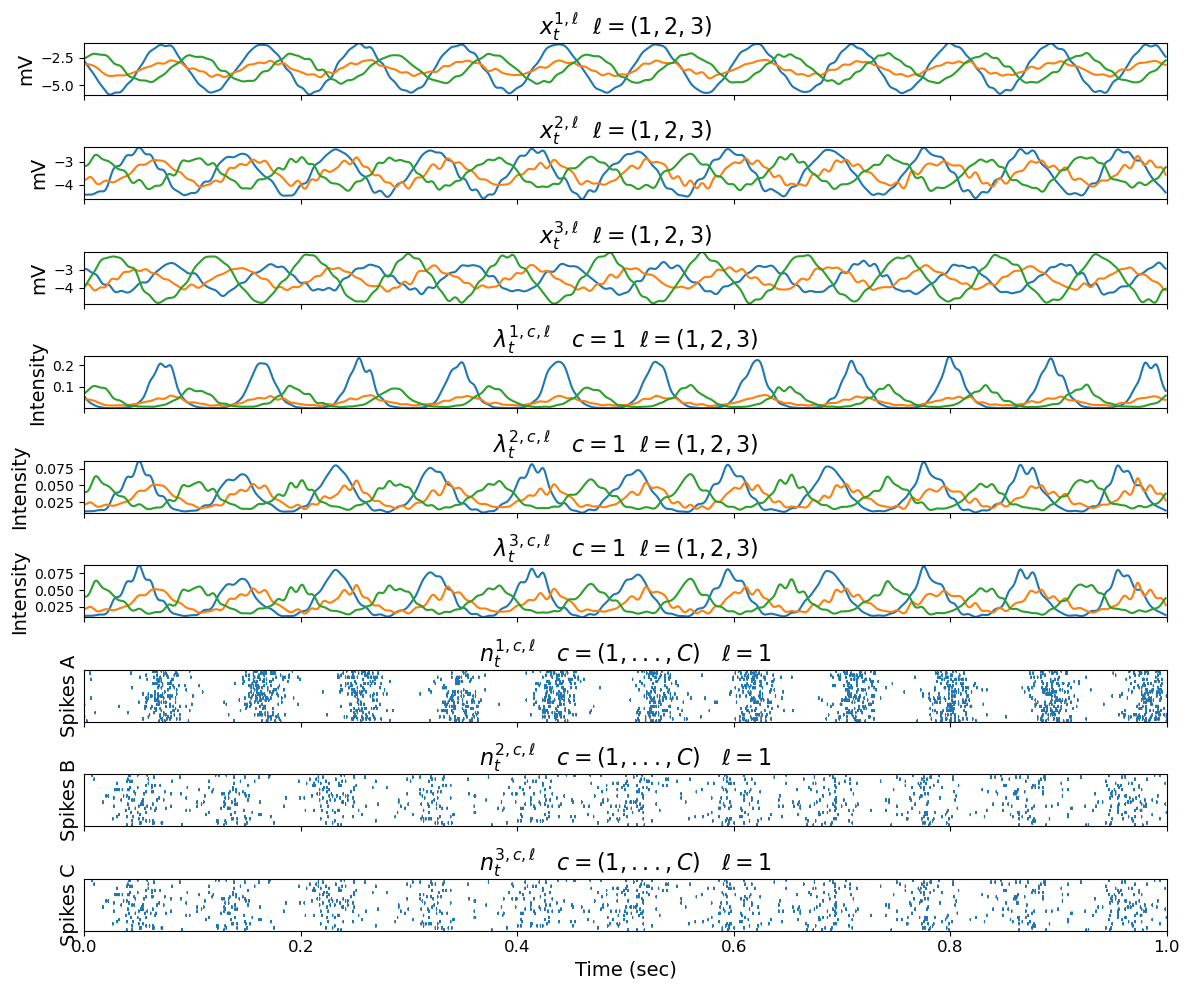

In [5]:
mu = -3.5
K = 3
L = 25 
C = 25
sample_length = 1000
seed = 8
plot_synthetic_data(L, sample_length, C, seed, mu, 
start=5)



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cohlib.utils import pickle_open, logistic
from cohlib.plot import draw_raster_single

sample_length = 1000
K = 3

Cs = [5,10,25,50]
Ls = [5,25,50]
mus = [-6.0, -3.5, -1.0]
seed = 8
# prev_model = model_load

In [84]:
Cs

[5, 10, 25, 50]

In [13]:
# K = 3
# L = 25 
# C = 25 
# mu -3.5

num_em=10
data_path = f'saved/synthetic_data/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}'
model_path = f'saved/fitted_models/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}_fitted'

data_load = pickle_open(data_path)
model_load = pickle_open(model_path)
Gamma = data_load['latent']['Gamma']
zs = data_load['latent']['zs']
spikes = data_load['observed']['spikes']

freqs = data_load['meta']['freqs']

Wv_model = model_load['Wv']
Wv = Wv_model
freqs_mod = freqs[:int((Wv.shape[1] - 1) / 2)]

J_max = int((Wv.shape[1]-1)/2)


In [11]:
from numpy.fft import rfft
spikes_ft = rfft(spikes, axis=3).mean(1)
spikes_ft_outer = np.einsum('lmj,lnj->jmnl', spikes_ft,spikes_ft.conj())
naive = spikes_ft_outer.mean(3)
zs.shape

(25, 3, 501)

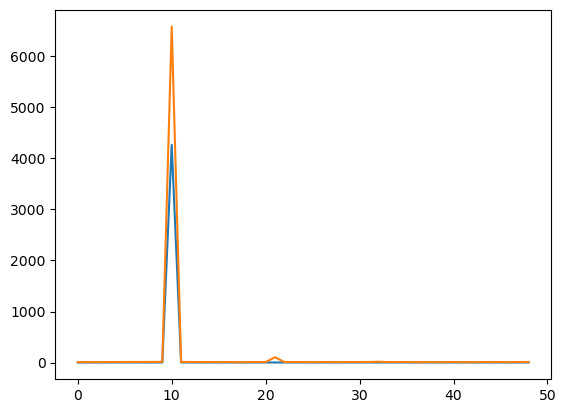

In [105]:
plt.plot(Gamma[:49,0,0].real)
# plt.plot(test[1:50,0,0].real)
plt.plot(test)

In [7]:
from cohlib.utils import conv_v_to_z
def Gamma_est_from_zs(zs, dc=True):
    if dc is True:
        zs_outer = np.einsum('ijk,imk->kjmi', zs[:,:,1:], zs[:,:,1:].conj())
    else:
        zs_outer = np.einsum('ijk,imk->kjmi', zs, zs.conj())
    zs_outer_mean = zs_outer.mean(3)
    return zs_outer_mean

In [8]:
from numpy.fft import rfft
def load_and_calc(func, K, L, sample_length, C, mu):
    data_path = f'saved/synthetic_data/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}'
    data_load = pickle_open(data_path)
    try:
        model_path = f'saved/fitted_models/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}_fitted'
        model_load = pickle_open(model_path)
    except:
        model_path = f'saved/fitted_models/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}_fitted_new'
        model_load = pickle_open(model_path)
    print(f'{K} {L} {C} {mu}')

    spikes = data_load['observed']['spikes']
    Gamma_true = data_load['latent']['Gamma']
    zs = data_load['latent']['zs']
    Wv_data = data_load['meta']['Wv']
    freqs = data_load['meta']['freqs']

    Wv_model = model_load['Wv']
    Wv = Wv_model
    freqs_mod = freqs[:int((Wv.shape[1] - 1) / 2)]

    J = int((Wv.shape[1]-1)/2)

    spikes_ft = rfft(spikes, axis=3).mean(1)
    spikes_ft_outer = np.einsum('lmj,lnj->jmnl', spikes_ft,spikes_ft.conj())
    naive = spikes_ft_outer.mean(3)

    func_true = func(Gamma_true[:J_max,:,:])
    func_naive = func(naive[1:J_max+1,:,:])
    model_est = model_load['Gamma']
    func_model = func(model_est)

    direct_est = Gamma_est_from_zs(zs[:,:,:J_max+1])
    func_zs = func(direct_est)

    return func_true, func_zs, func_model, func_naive

In [16]:
Ks = [3,6]
Cs = [5,10,25,50]
Ls = [5,25,50]
mus = [-6.0, -3.5, -1.0]
J_max = 49
func = get_globalcoh

gcohs = np.zeros((len(Ks), len(Ls), len(Cs), len(mus), 4, J_max))
for k, num_groups in enumerate(Ks):
    for l, num_trials in enumerate(Ls):
        for c, num_neurons in enumerate(Cs):
            for m, mu in enumerate(mus):
                    coh_true, coh_zs, coh_model, coh_naive = load_and_calc(func, num_groups, num_trials, 1000, num_neurons, mu)
                    gcohs[k,l,c,m,0,:] = coh_true
                    gcohs[k,l,c,m,1,:] = coh_zs
                    gcohs[k,l,c,m,2,:] = coh_model
                    gcohs[k,l,c,m,3,:] = coh_naive


3 5 5 -6.0
3 5 5 -3.5
3 5 5 -1.0
3 5 10 -6.0
3 5 10 -3.5
3 5 10 -1.0
3 5 25 -6.0
3 5 25 -3.5
3 5 25 -1.0
3 5 50 -6.0
3 5 50 -3.5
3 5 50 -1.0
3 25 5 -6.0
3 25 5 -3.5
3 25 5 -1.0
3 25 10 -6.0
3 25 10 -3.5
3 25 10 -1.0
3 25 25 -6.0
3 25 25 -3.5
3 25 25 -1.0
3 25 50 -6.0
3 25 50 -3.5
3 25 50 -1.0
3 50 5 -6.0
3 50 5 -3.5
3 50 5 -1.0
3 50 10 -6.0
3 50 10 -3.5
3 50 10 -1.0
3 50 25 -6.0
3 50 25 -3.5
3 50 25 -1.0
3 50 50 -6.0
3 50 50 -3.5
3 50 50 -1.0
6 5 5 -6.0
6 5 5 -3.5
6 5 5 -1.0
6 5 10 -6.0
6 5 10 -3.5
6 5 10 -1.0
6 5 25 -6.0
6 5 25 -3.5
6 5 25 -1.0
6 5 50 -6.0
6 5 50 -3.5
6 5 50 -1.0
6 25 5 -6.0
6 25 5 -3.5
6 25 5 -1.0
6 25 10 -6.0
6 25 10 -3.5
6 25 10 -1.0
6 25 25 -6.0
6 25 25 -3.5
6 25 25 -1.0
6 25 50 -6.0
6 25 50 -3.5
6 25 50 -1.0
6 50 5 -6.0
6 50 5 -3.5
6 50 5 -1.0
6 50 10 -6.0
6 50 10 -3.5
6 50 10 -1.0
6 50 25 -6.0
6 50 25 -3.5
6 50 25 -1.0
6 50 50 -6.0
6 50 50 -3.5
6 50 50 -1.0


In [9]:
def get_power1(Gamma):
    return Gamma[:,0,0].real


In [10]:
Ks = [3,6]
Cs = [5,10,25,50]
Ls = [5,25,50]
mus = [-6.0, -3.5, -1.0]
J_max = 49

power1s = np.zeros((len(Ks), len(Ls), len(Cs), len(mus), 4, J_max))
for k, num_groups in enumerate(Ks):
    for l, num_trials in enumerate(Ls):
        for c, num_neurons in enumerate(Cs):
            for m, mu in enumerate(mus):
                    power1_true, power1_zs, power1_model, power1_naive = load_and_calc(get_power1, num_groups, num_trials, 1000, num_neurons, mu)
                    power1s[k,l,c,m,0,:] = 10*np.log10(power1_true)
                    power1s[k,l,c,m,1,:] = 10*np.log10(power1_zs)
                    power1s[k,l,c,m,2,:] = 10*np.log10(power1_model)
                    power1s[k,l,c,m,3,:] = 10*np.log10(power1_naive * (2*np.pi)**2)


3 5 5 -6.0
3 5 5 -3.5
3 5 5 -1.0
3 5 10 -6.0
3 5 10 -3.5
3 5 10 -1.0
3 5 25 -6.0
3 5 25 -3.5
3 5 25 -1.0
3 5 50 -6.0
3 5 50 -3.5
3 5 50 -1.0
3 25 5 -6.0
3 25 5 -3.5
3 25 5 -1.0
3 25 10 -6.0
3 25 10 -3.5
3 25 10 -1.0
3 25 25 -6.0
3 25 25 -3.5
3 25 25 -1.0
3 25 50 -6.0
3 25 50 -3.5
3 25 50 -1.0
3 50 5 -6.0
3 50 5 -3.5
3 50 5 -1.0
3 50 10 -6.0
3 50 10 -3.5
3 50 10 -1.0
3 50 25 -6.0
3 50 25 -3.5
3 50 25 -1.0
3 50 50 -6.0
3 50 50 -3.5
3 50 50 -1.0
6 5 5 -6.0
6 5 5 -3.5
6 5 5 -1.0
6 5 10 -6.0
6 5 10 -3.5
6 5 10 -1.0
6 5 25 -6.0
6 5 25 -3.5
6 5 25 -1.0
6 5 50 -6.0
6 5 50 -3.5
6 5 50 -1.0
6 25 5 -6.0
6 25 5 -3.5
6 25 5 -1.0
6 25 10 -6.0
6 25 10 -3.5
6 25 10 -1.0
6 25 25 -6.0
6 25 25 -3.5
6 25 25 -1.0
6 25 50 -6.0
6 25 50 -3.5
6 25 50 -1.0
6 50 5 -6.0
6 50 5 -3.5
6 50 5 -1.0
6 50 10 -6.0
6 50 10 -3.5
6 50 10 -1.0
6 50 25 -6.0
6 50 25 -3.5
6 50 25 -1.0
6 50 50 -6.0
6 50 50 -3.5
6 50 50 -1.0


(0.3, 1.0)

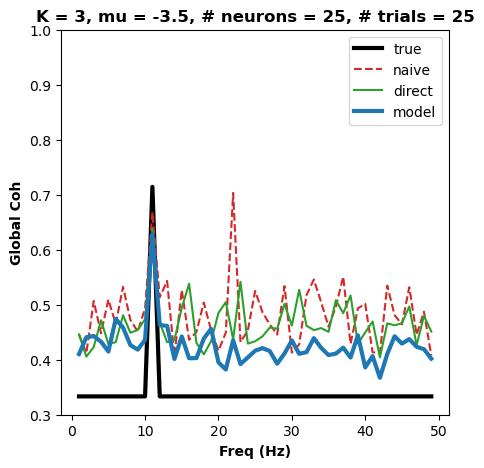

In [28]:
k = 0
l = 1
c = 2
m = 1
coh_true = gcohs[k,l,c,m,0,:] 
coh_zs = gcohs[k,l,c,m,1,:] 
coh_model = gcohs[k,l,c,m,2,:] 
coh_naive = gcohs[k,l,c,m,3,:] 

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(freqs_mod, coh_true, color='k', label='true', linewidth=3)
ax.plot(freqs_mod, coh_naive, linestyle='--', color='tab:red', label='naive')
ax.plot(freqs_mod, coh_zs, color='tab:green', label='direct')
ax.plot(freqs_mod, coh_model, color='tab:blue', linewidth=3, label='model')

ax.set_title(f'K = {Ks[k]}, mu = {mus[m]}, # neurons = {Cs[c]}, # trials = {Ls[l]}', fontweight='bold')
ax.set_ylabel(f'Global Coh', fontweight='bold')
ax.set_xlabel('Freq (Hz)', fontweight='bold')
ax.legend()
ax.set_ylim([0.3, 1])

In [56]:
import math
np.round(math.floor((1/4) * 10)*(1/10),3)

0.2

In [57]:
num_em = 10
from numpy.fft import rfft

k = 0
m = 1

def plot_lc_for_km(k, m):
    fig, ax = plt.subplots(3,4, figsize=(20,10), sharex=True, sharey=True)
    for c in range(len(Cs)):
        for l in range(len(Ls)):
            coh_true = gcohs[k,l,c,m,0,:] 
            coh_zs = gcohs[k,l,c,m,1,:] 
            coh_model = gcohs[k,l,c,m,2,:] 
            coh_naive = gcohs[k,l,c,m,3,:] 

            ax[l,c].plot(freqs_mod, coh_true, color='k', label='true', linewidth=3)
            ax[l,c].plot(freqs_mod, coh_naive, linestyle='--', color='tab:red', label='naive')
            ax[l,c].plot(freqs_mod, coh_zs, color='tab:green', label='direct')
            ax[l,c].plot(freqs_mod, coh_model, color='tab:blue', linewidth=3, label='model')

            if l == 0:
                ax[l,c].set_title(f'# neurons = {Cs[c]}', fontweight='bold')
            if c == 0:
                ax[l,c].set_ylabel(f'# trials = {Ls[l]}', fontweight='bold')
            if l == len(Ls)-1:
                ax[l,c].set_xlabel('Freq (Hz)', fontweight='bold')
            if k == 3:
                low = np.round(math.floor((1/Ks[k]) * 10)*(1/10),3)
                ax[l,c].set_ylim([low, 1])
    plt.tight_layout()

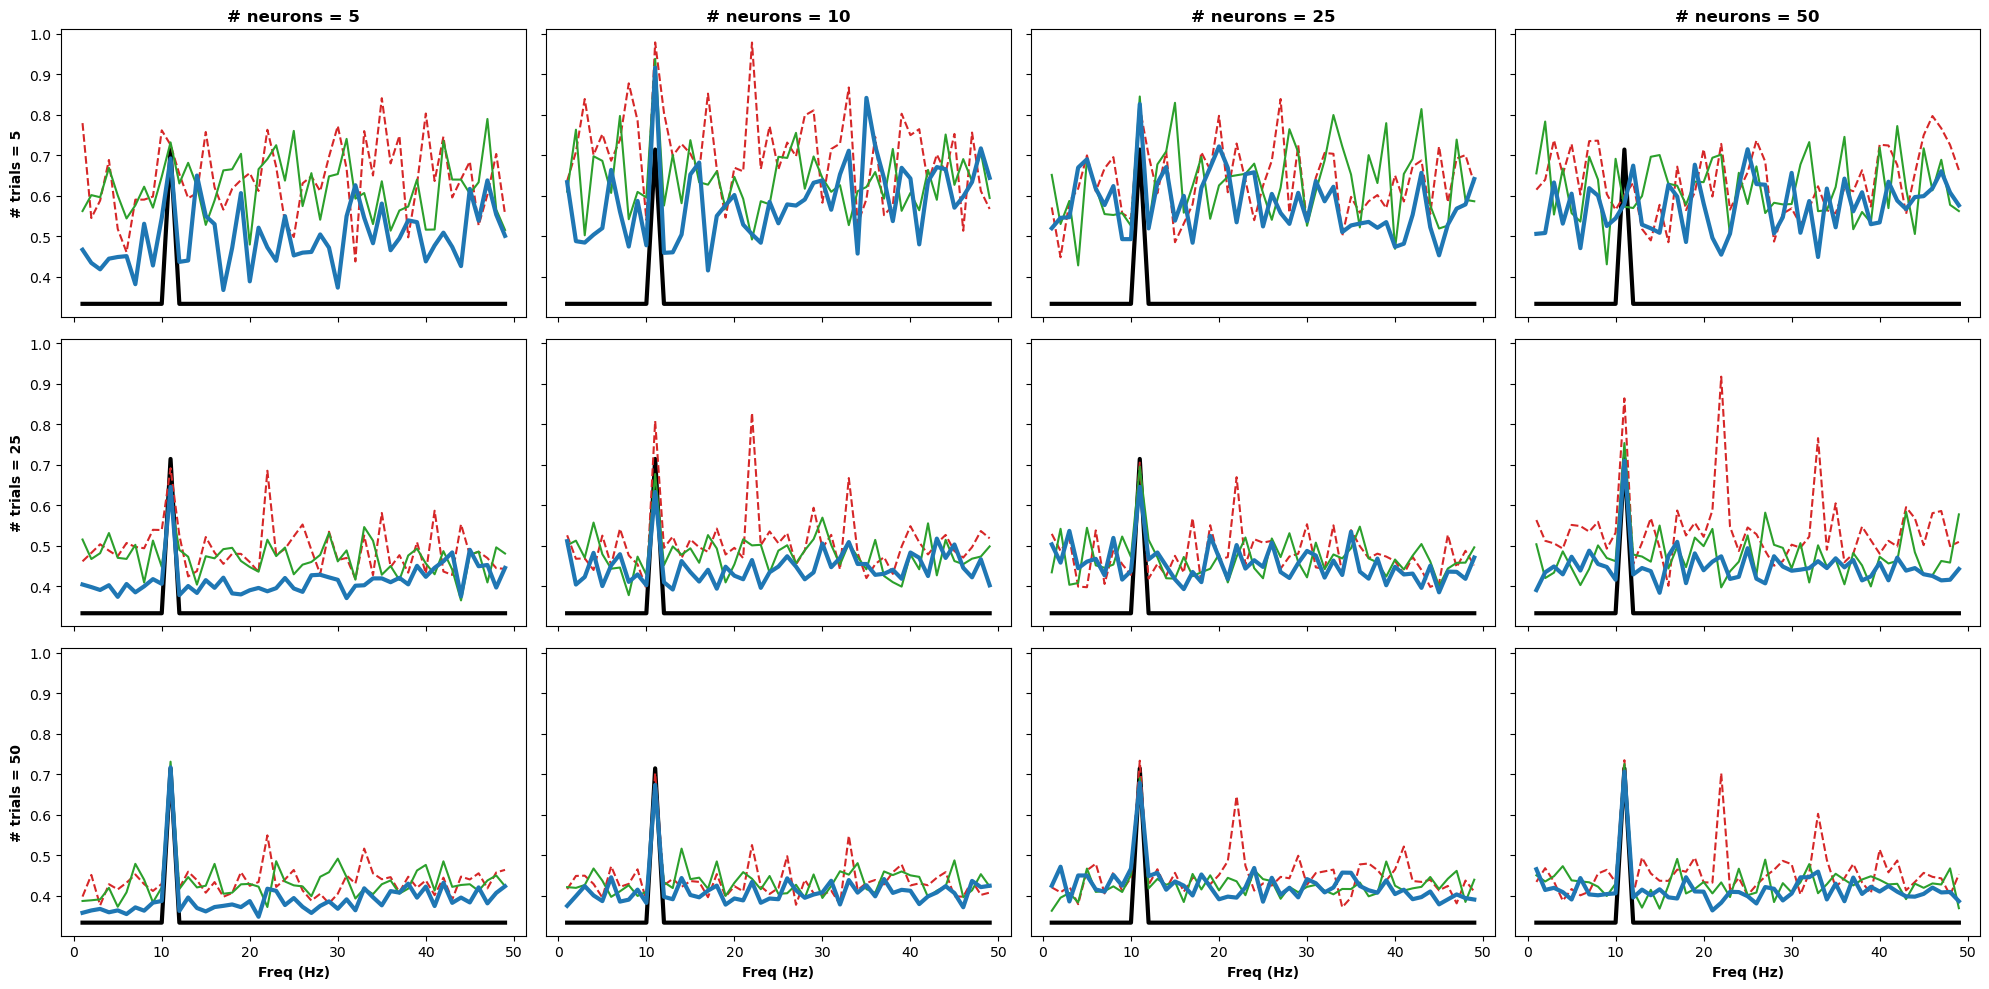

In [58]:
plot_lc_for_km(0,0)

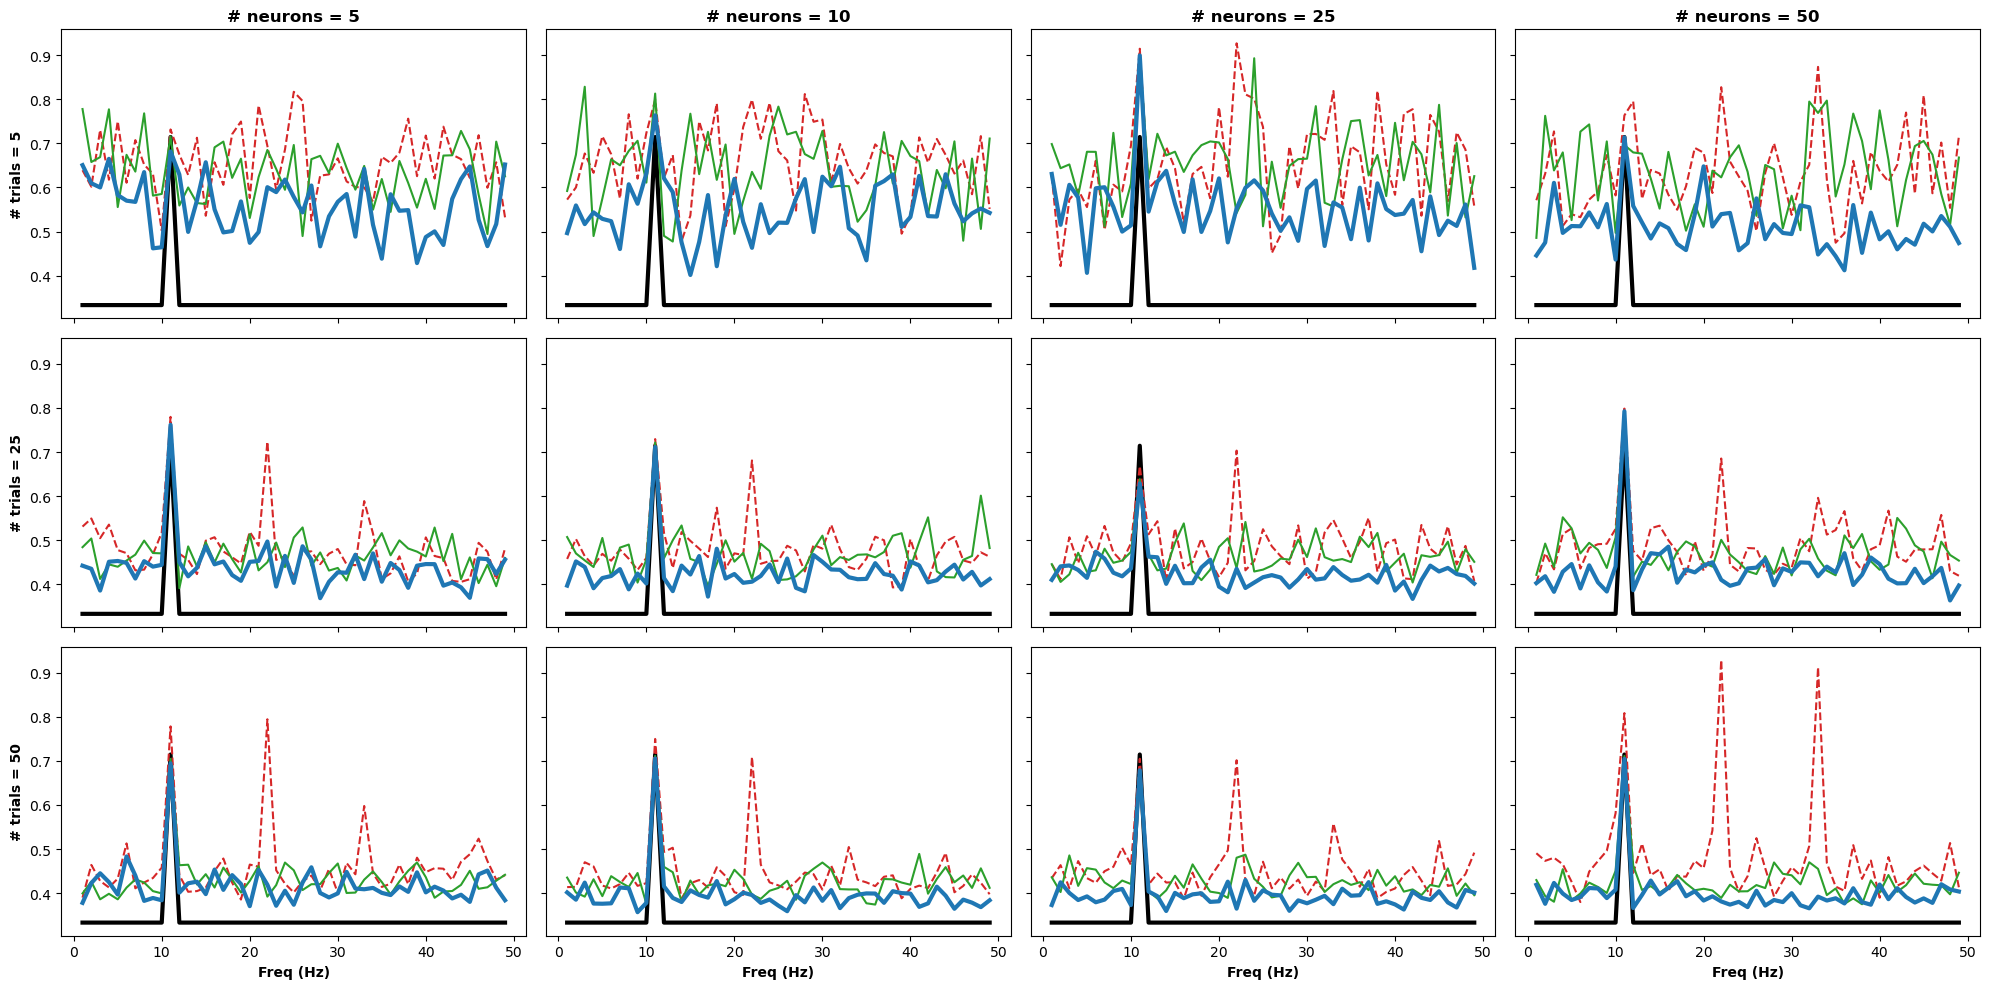

In [59]:
plot_lc_for_km(0,1)

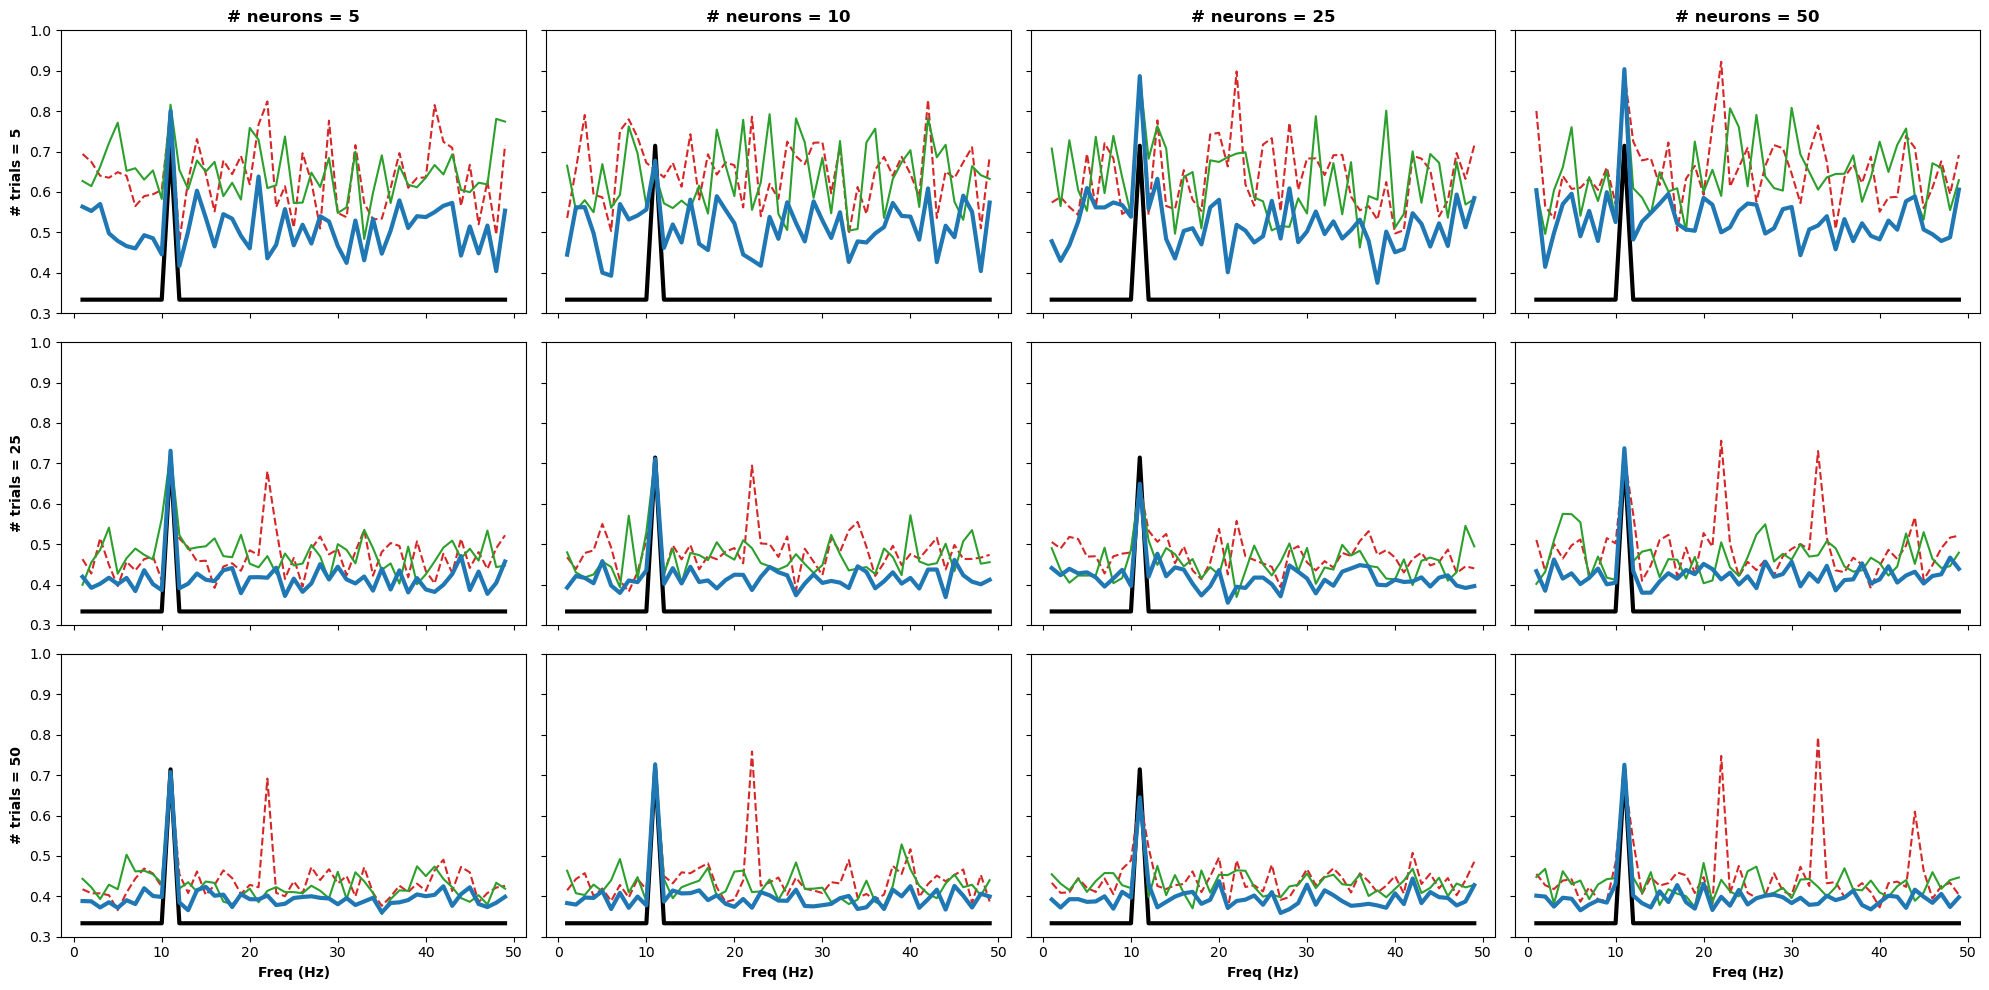

In [18]:
plot_lc_for_km(0,2)

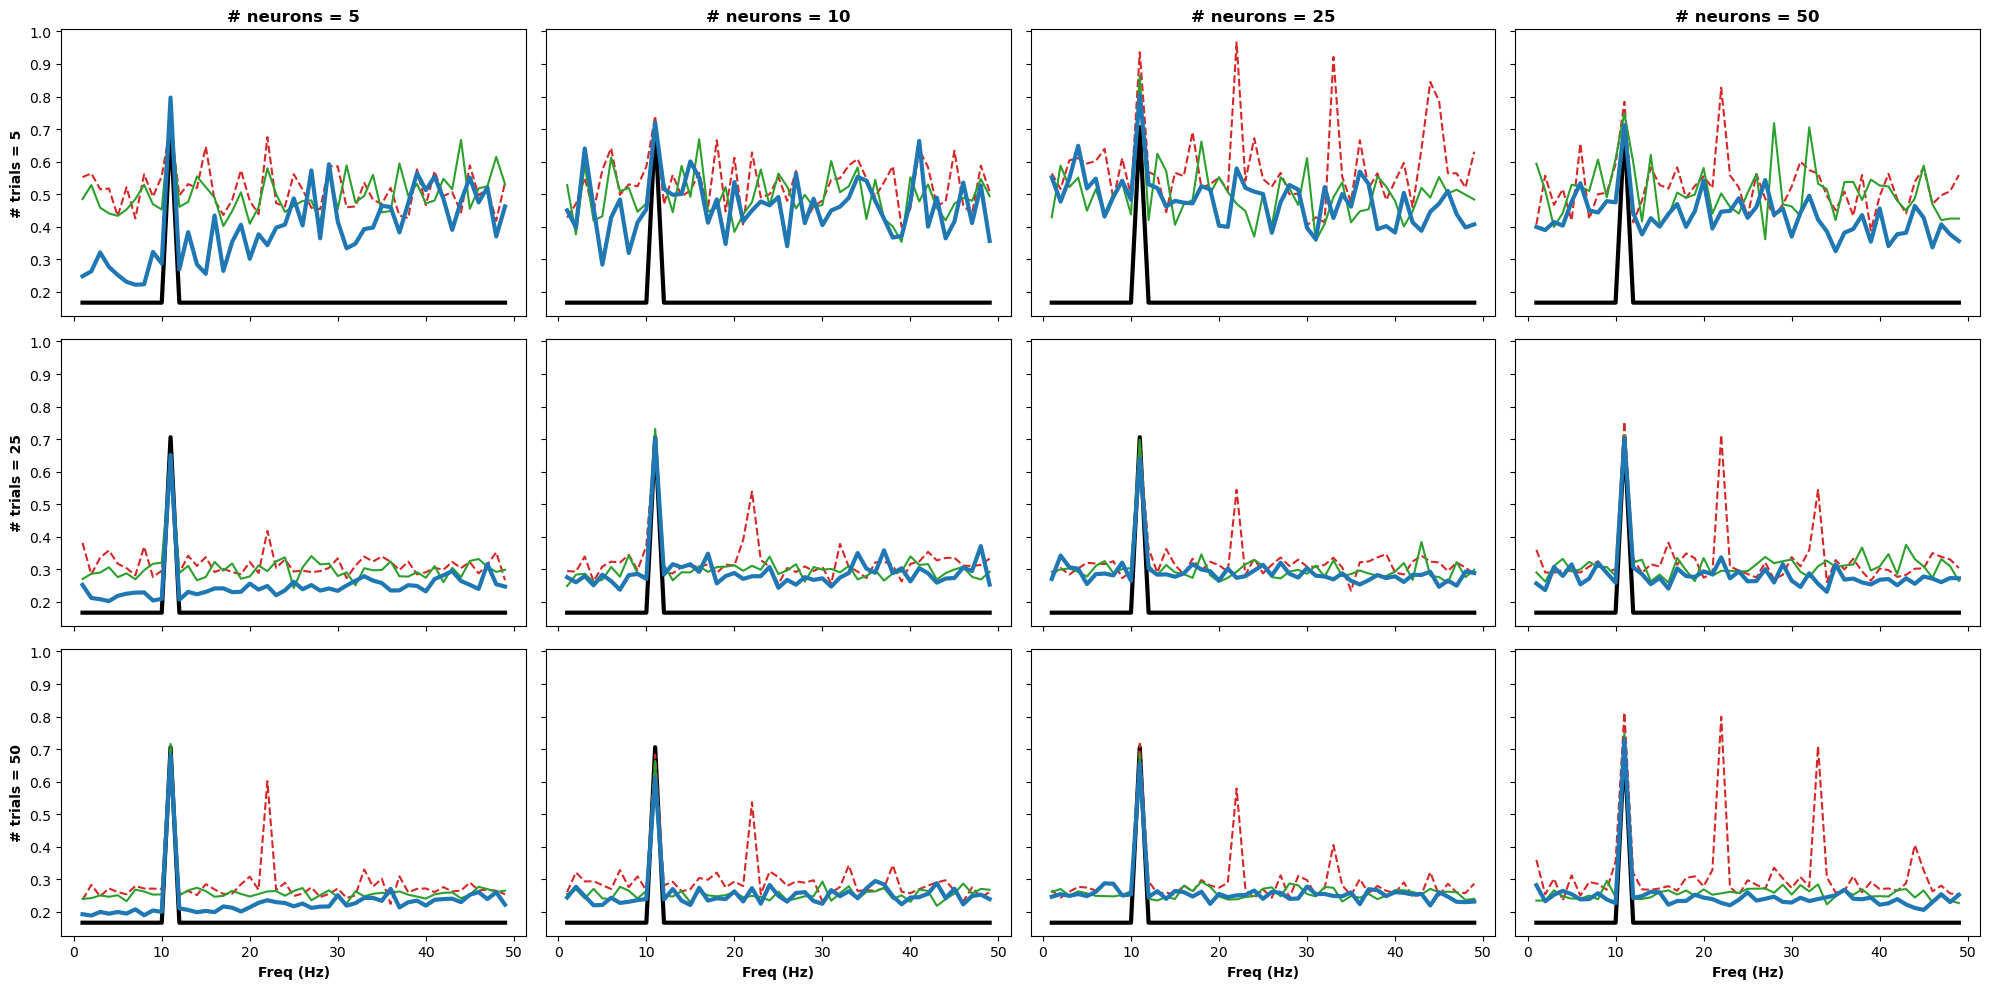

In [40]:
plot_lc_for_km(1,0)

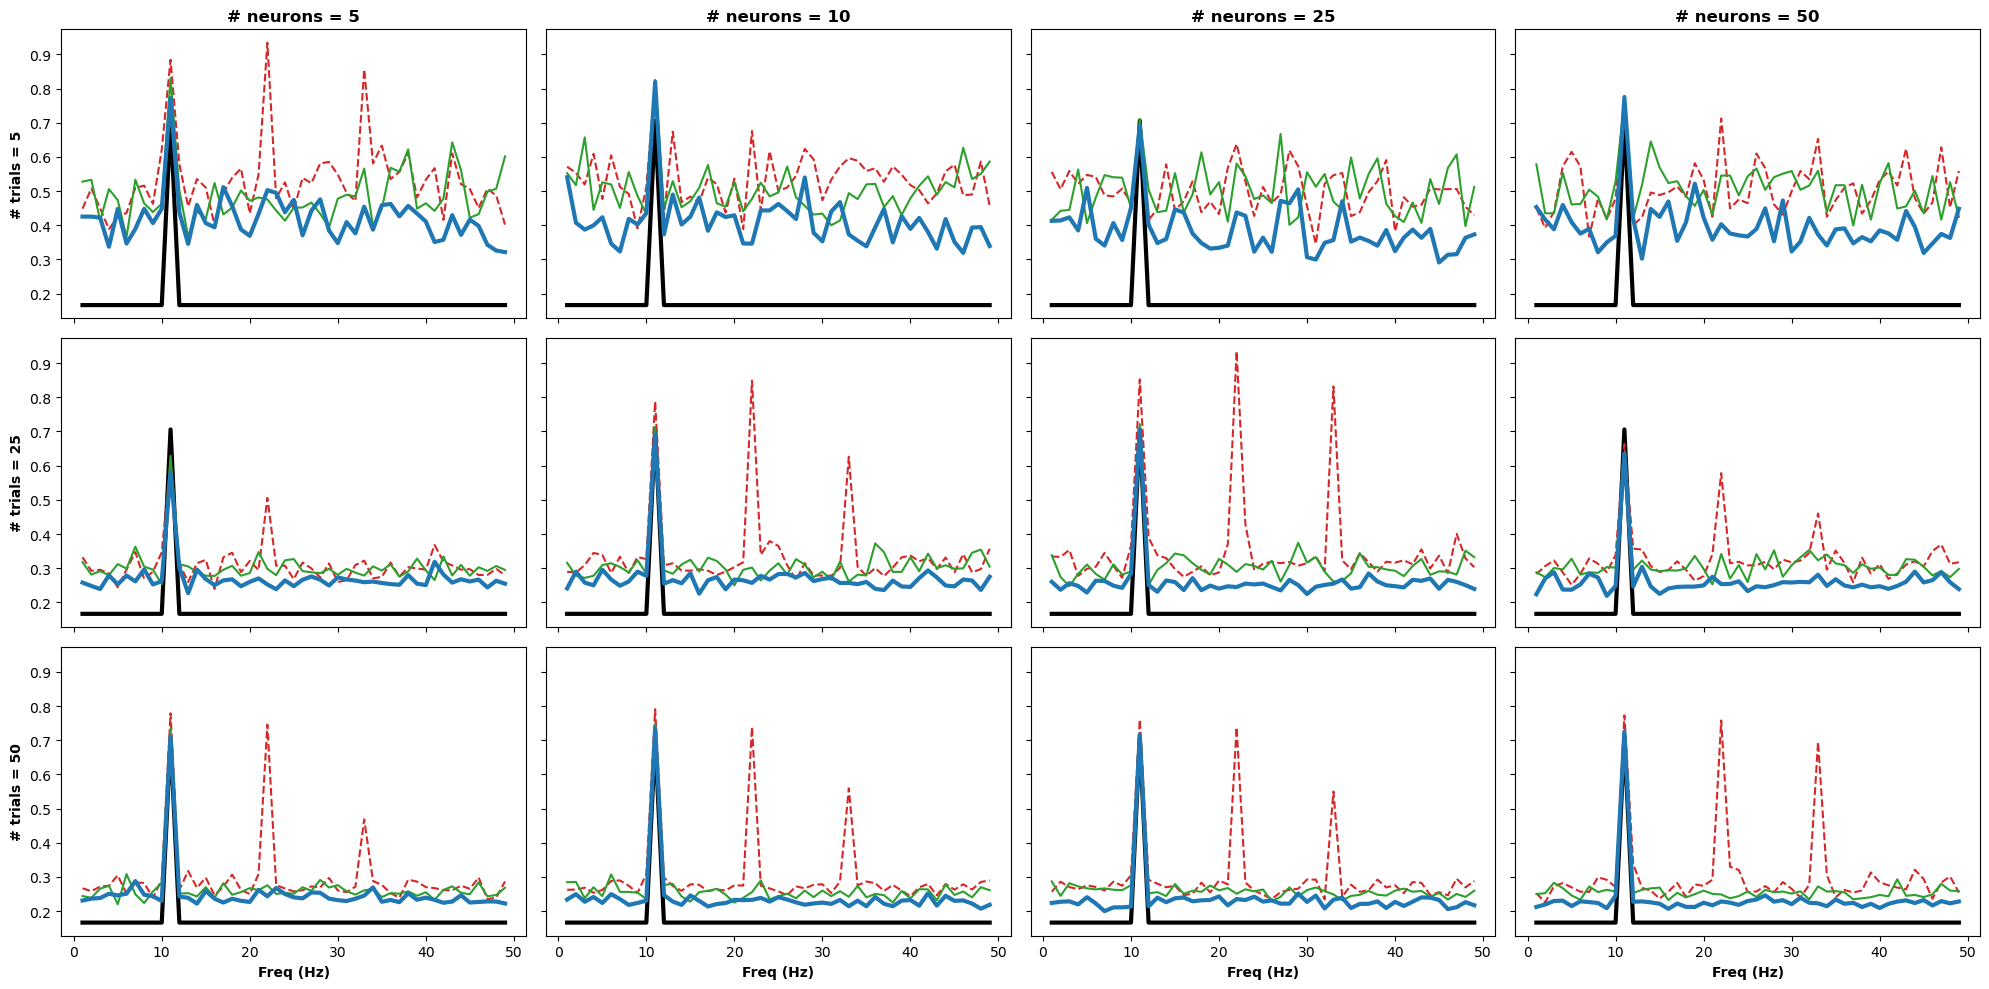

In [41]:
plot_lc_for_km(1,1)

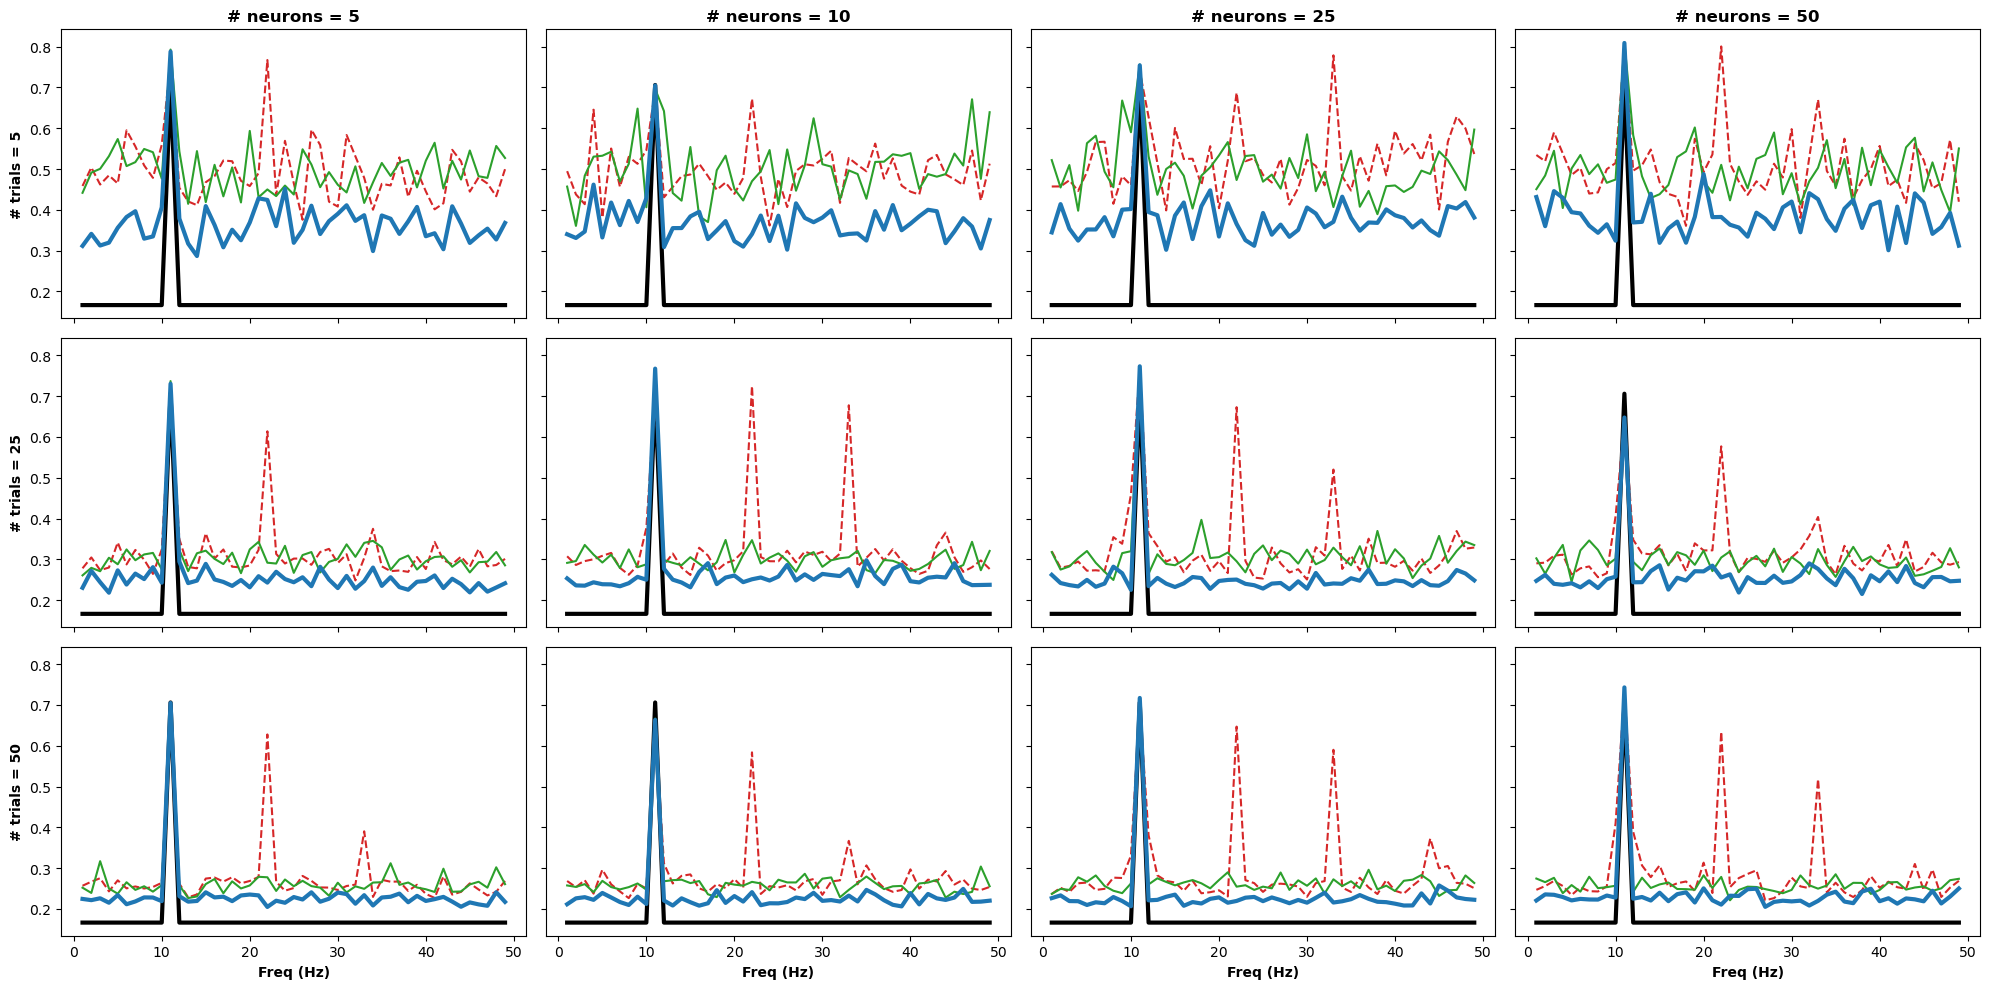

In [42]:
plot_lc_for_km(1,2)

In [11]:
num_em = 10
from numpy.fft import rfft

k = 0
m = 1

def plot_power1_lc_for_km(k, m):
    fig, ax = plt.subplots(3,4, figsize=(20,10), sharex=True, sharey=True)
    for c in range(len(Cs)):
        for l in range(len(Ls)):
            power1_true = power1s[k,l,c,m,0,:] 
            power1_zs = power1s[k,l,c,m,1,:] 
            power1_model = power1s[k,l,c,m,2,:] 
            power1_naive = power1s[k,l,c,m,3,:] 

            ax[l,c].plot(freqs_mod, power1_true, color='k', label='true', linewidth=3)
            ax[l,c].plot(freqs_mod, power1_naive, linestyle='--', color='tab:red', label='naive')
            ax[l,c].plot(freqs_mod, power1_zs, color='tab:green', label='direct')
            ax[l,c].plot(freqs_mod, power1_model, color='tab:blue', linewidth=3, label='model')

            if l == 0:
                ax[l,c].set_title(f'# neurons = {Cs[c]}', fontweight='bold')
            if c == 0:
                ax[l,c].set_ylabel(f'# trials = {Ls[l]}', fontweight='bold')
            if l == len(Ls)-1:
                ax[l,c].set_xlabel('Freq (Hz)', fontweight='bold')
            # if k == 3:
                # low = np.round(math.floor((1/Ks[k]) * 10)*(1/10),3)
                # ax[l,c].set_ylim([low, 1])
    plt.tight_layout()

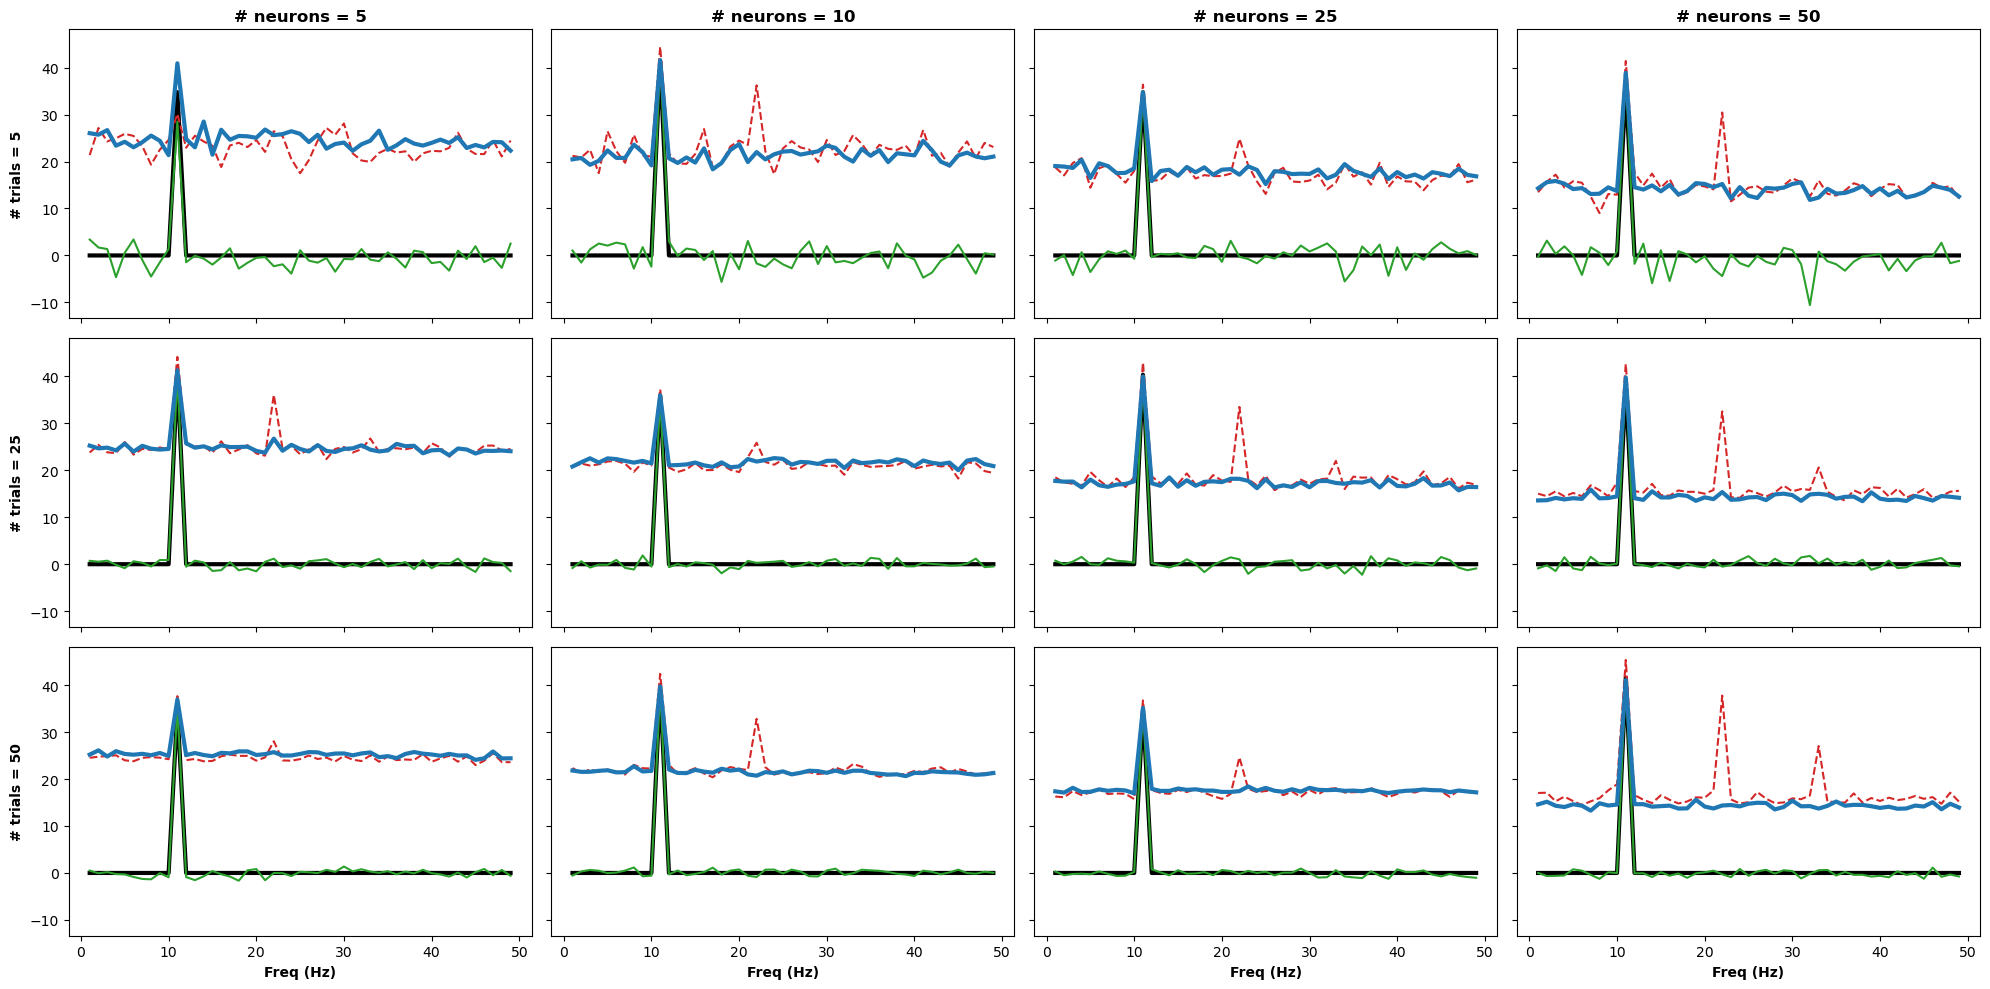

In [15]:
plot_power1_lc_for_km(0,1)

In [96]:
Ks = [3,6]
Cs = [5,10,25,50]
Ls = [5,25,50]
mus = [-6.0, -3.5, -1.0]
J_max = 49

power1s = np.zeros((len(Ks), len(Ls), len(Cs), len(mus), 4, J_max))
power1s_nodb = np.zeros((len(Ks), len(Ls), len(Cs), len(mus), 4, J_max))
for k, num_groups in enumerate(Ks):
    for l, num_trials in enumerate(Ls):
        for c, num_neurons in enumerate(Cs):
            for m, mu in enumerate(mus):
                    power1_true, power1_zs, power1_model, power1_naive = load_and_calc(get_power1, num_groups, num_trials, 1000, num_neurons, mu)
                    power1s[k,l,c,m,0,:] = 10*np.log10(power1_true)
                    power1s[k,l,c,m,1,:] = 10*np.log10(power1_zs)
                    power1s[k,l,c,m,2,:] = 10*np.log10(power1_model)
                    power1s[k,l,c,m,3,:] = 10*np.log10(power1_naive * (2*np.pi)**2)

                    power1s_nodb[k,l,c,m,0,:] = (power1_true)
                    power1s_nodb[k,l,c,m,1,:] = (power1_zs)
                    power1s_nodb[k,l,c,m,2,:] = (power1_model)
                    power1s_nodb[k,l,c,m,3,:] = (power1_naive * (2*np.pi)**2)





3 5 5 -6.0
3 5 5 -3.5
3 5 5 -1.0
3 5 10 -6.0
3 5 10 -3.5
3 5 10 -1.0
3 5 25 -6.0
3 5 25 -3.5
3 5 25 -1.0
3 5 50 -6.0
3 5 50 -3.5
3 5 50 -1.0
3 25 5 -6.0
3 25 5 -3.5
3 25 5 -1.0
3 25 10 -6.0
3 25 10 -3.5
3 25 10 -1.0
3 25 25 -6.0
3 25 25 -3.5
3 25 25 -1.0
3 25 50 -6.0
3 25 50 -3.5
3 25 50 -1.0
3 50 5 -6.0
3 50 5 -3.5
3 50 5 -1.0
3 50 10 -6.0
3 50 10 -3.5
3 50 10 -1.0
3 50 25 -6.0
3 50 25 -3.5
3 50 25 -1.0
3 50 50 -6.0
3 50 50 -3.5
3 50 50 -1.0
6 5 5 -6.0
6 5 5 -3.5
6 5 5 -1.0
6 5 10 -6.0
6 5 10 -3.5
6 5 10 -1.0
6 5 25 -6.0
6 5 25 -3.5
6 5 25 -1.0
6 5 50 -6.0
6 5 50 -3.5
6 5 50 -1.0
6 25 5 -6.0
6 25 5 -3.5
6 25 5 -1.0
6 25 10 -6.0
6 25 10 -3.5
6 25 10 -1.0
6 25 25 -6.0
6 25 25 -3.5
6 25 25 -1.0
6 25 50 -6.0
6 25 50 -3.5
6 25 50 -1.0
6 50 5 -6.0
6 50 5 -3.5
6 50 5 -1.0
6 50 10 -6.0
6 50 10 -3.5
6 50 10 -1.0
6 50 25 -6.0
6 50 25 -3.5
6 50 25 -1.0
6 50 50 -6.0
6 50 50 -3.5
6 50 50 -1.0


In [71]:
K = 3
C = 25
L = 25
mu = -3.5

model_path = f'saved/fitted_models/simple_synthetic_{K}_{L}_{sample_length}_{C}_{mu}_{seed}_fitted'
model_load = pickle_open(model_path)

In [72]:
model_load['Gamma'].shape

(49, 3, 3)

In [73]:
model_load['Gamma'][:,0,0]

array([  59.35195886+0.j,   57.23119661+0.j,   57.57075391+0.j,
         43.31346308+0.j,   63.3745124 +0.j,   47.95876105+0.j,
         44.46701662+0.j,   49.53442278+0.j,   51.04600285+0.j,
         58.17668711+0.j, 9945.42685927+0.j,   52.79953747+0.j,
         46.66495086+0.j,   70.38764227+0.j,   44.64696192+0.j,
         61.34610355+0.j,   46.83545266+0.j,   56.72895829+0.j,
         58.16379332+0.j,   55.9301717 +0.j,   65.9034346 +0.j,
         65.77508359+0.j,   59.57224866+0.j,   41.52885388+0.j,
         64.13573973+0.j,   43.10961493+0.j,   47.78737748+0.j,
         44.09894247+0.j,   55.28285018+0.j,   43.43753156+0.j,
         58.79567037+0.j,   59.26006306+0.j,   53.70248657+0.j,
         51.68429756+0.j,   55.79923297+0.j,   54.58377489+0.j,
         61.63809091+0.j,   42.98185676+0.j,   63.9855242 +0.j,
         46.38666306+0.j,   45.39056024+0.j,   51.70852391+0.j,
         68.08779169+0.j,   47.12669907+0.j,   47.48816932+0.j,
         55.00072416+0.j,   37.29334355+

In [84]:
Gamma_mod = np.zeros((500,3,3), dtype=complex)
Gamma_mod[:49,:,:] = model_load['Gamma']

/scratch/247090.1.ood/ipykernel_429751/213579745.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(Gamma_mod[:,0,0].real))


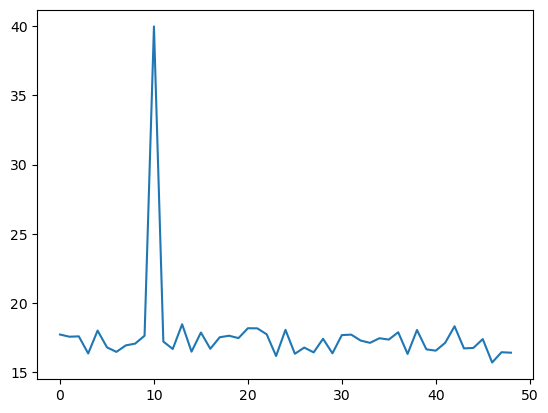

In [75]:
plt.plot(10*np.log10(Gamma_mod[:,0,0].real))

In [86]:
fs = 1000

latent, meta = construct_latent_and_sample3_mod(Gamma_mod, freqs, sample_length, L, fs, K, mu)
# latent_meta = construct_latent_and_sample3_mod

xs = latent['xs']

lams = np.apply_along_axis(logistic, 2, xs)
spikes = sample_spikes_from_xs(lams, C)


meta['L'] = L
meta['C'] = C
meta['seed'] = seed
meta['sample_length'] = sample_length
meta['fs'] = 1000


observed = dict(spikes=spikes, lams=lams, mu=mu)

save_dict = dict(latent=latent, meta=meta, observed=observed)




/scratch/247090.1.ood/ipykernel_429751/1264842217.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(save_dict['latent']['Gamma'][:,0,0]))
/scratch/247090.1.ood/ipykernel_429751/1264842217.py:1: RuntimeWarning: invalid value encountered in multiply
  plt.plot(10*np.log10(save_dict['latent']['Gamma'][:,0,0]))
/projectnb/stephenlab/jtauber/.conda/envs/test_env2/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/projectnb/stephenlab/jtauber/.conda/envs/test_env2/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


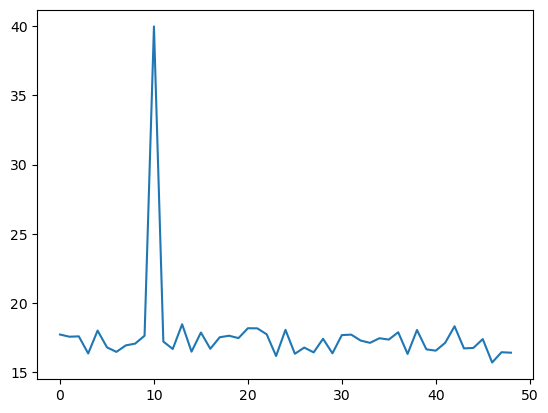

In [87]:
plt.plot(10*np.log10(save_dict['latent']['Gamma'][:,0,0]))

In [88]:
from cohlib.utils import pickle_save
save_path = f'saved/synthetic_data/model_sampled_{K}_{L}_{sample_length}_{C}_{mu}_{seed}'
pickle_save(save_dict, save_path)

In [80]:
from cohlib.mvcn import sample_mvcn_time_obs
from cohlib.alg.transform import construct_real_idft, construct_real_idft_mod
from cohlib.utils import get_dcval
def construct_latent_and_sample3_mod(Gamma, freqs, sample_length, L, fs, K, mu):
    n_freqs = Gamma.shape[0]

    J = n_freqs
    # for j in range(J):
    #     _, eig_vecs = np.linalg.eigh(Gamma[j,:,:])
    #     mod_vals = np.array([1000, 1000, 1000])
    #     new_mat = eig_vecs @ np.diag(mod_vals) @ eig_vecs.conj().T
    #     new_mat = new_mat*1e-3
    #     Gamma[j,:,:] = new_mat

    # eig_vals, eig_vecs = np.linalg.eigh(Gamma[10,:,:])

    # mod_vals = np.array([15000, 3000, 3000])

    # Gamma[10,:,:] = eig_vecs @ np.diag(mod_vals) @ eig_vecs.conj().T

    # Gamma_reduce = Gamma.copy()
    # Gamma_reduce[100:,:,:] = 0
    # freqs_reduce = freqs
    Gamma_reduce = Gamma
    freqs_reduce = freqs



    # Draw observations from mvcn (in time domain) 

    # TODO refactor for mvcn
    Wv = construct_real_idft(sample_length, freqs.size, fs)
    Wv_reduce = Wv
    # xs, vs, zs = sample_mvcn_time_obs(Gamma_reduce, L, freqs, Wv, dc_vals, return_all=True)
    # Wv_reduce = construct_real_idft_mod(sample_length, n_freqs, 100, fs)
    # J_mod = Wv_reduce.shape[1]
    J_mod = (sample_length/2)
    dc_vals = np.array([get_dcval(mu, J_mod) for k in range(K)])

    xs, vs, zs = sample_mvcn_time_obs(Gamma_reduce, L, freqs_reduce, Wv_reduce, dc_vals, return_all=True)

    latent = dict(Gamma=Gamma_reduce, xs=xs, vs=vs, zs=zs)
    meta = dict(freqs=freqs, Wv=Wv_reduce)

    return latent, meta

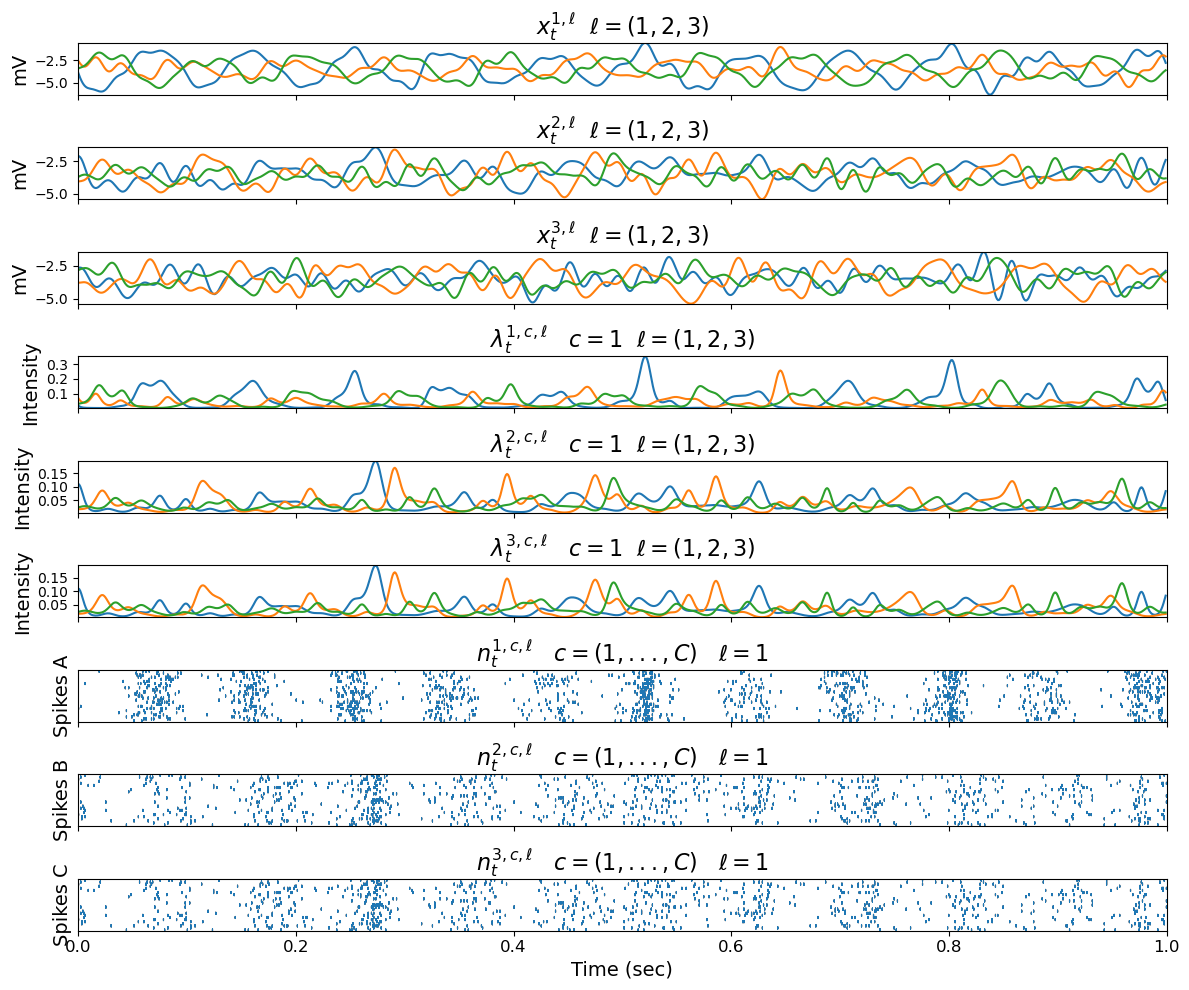

In [89]:
T = sample_length/fs
trange=[0,T]
start = 5
data_load = save_dict

spikes = data_load['observed']['spikes']

Gamma = data_load['latent']['Gamma']
xs = data_load['latent']['xs']
vs = data_load['latent']['vs']
zs = data_load['latent']['zs']
lams = data_load['observed']['lams']

freqs = data_load['meta']['freqs']

swap = False
ls = [0,1,2]
fig,ax = plt.subplots(9,1,figsize=(12,10), sharex=True)
ls = [l + start for l in ls]
title_size = 16
label_size = 14
x = np.arange(0, sample_length) / 1000
# for i in range(start,start+3):
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i, l in enumerate(ls):
# i = 3
    
    ax[0].plot(x, xs[l,0,:], color=colors[i])
    # ax[0].set_ylim([-1,1])
    ax[0].margins(0)
    ax[0].set_title(r'$x_t^{1, \ell}$  $\ell = (1,2,3)$', size=title_size)
    ax[0].set_ylabel('mV', size = label_size)

    ax[1].plot(x, xs[l,1,:], color=colors[i])
    # ax[1].set_ylim([-1,1])
    ax[1].margins(0)
    ax[1].set_title(r'$x_t^{2, \ell}$  $\ell = (1,2,3)$', size=title_size)
    ax[1].set_ylabel('mV', size = label_size)

    ax[2].plot(x, xs[l,2,:], color=colors[i])
    ax[2].margins(0)
    ax[2].set_title(r'$x_t^{3, \ell}$  $\ell = (1,2,3)$', size=title_size)
    ax[2].set_ylabel('mV', size = label_size)
    
    ax[3].plot(x, lams[l,0,:], color=colors[i])
    ax[3].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[3].margins(0)
    ax[3].set_ylabel('Intensity', size = label_size)

    ax[4].plot(x, lams[l,1,:], color=colors[i])
    ax[4].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[4].margins(0)
    ax[4].set_ylabel('Intensity', size = label_size)

    ax[5].plot(x, lams[l,1,:], color=colors[i])
    ax[5].set_title(r'$\lambda_t^{3, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[5].margins(0)
    ax[5].set_ylabel('Intensity', size = label_size)
# draw_raster_single(spikes[start,:,:], trange=[0,0.5], region='CPB', override_bg_color='white',ax=ax[3])
color = colors[0]
spike_matA = spikes[ls[0],:,0,:]
spike_matB = spikes[ls[0],:,1,:]
spike_matC = spikes[ls[0],:,2,:]
draw_raster_single(spike_matA, trange=trange, color_name=color, ax=ax[6])
draw_raster_single(spike_matB, trange=trange, color_name=color, ax=ax[7])
draw_raster_single(spike_matB, trange=trange, color_name=color, ax=ax[8])
ax[6].set_title(r'$n_t^{1, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
ax[7].set_title(r'$n_t^{2, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
ax[8].set_title(r'$n_t^{3, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
ax[6].set_ylabel('Spikes A', size = label_size)
ax[7].set_ylabel('Spikes B', size = label_size)
ax[8].set_ylabel('Spikes C', size = label_size)

ax[8].set_xlabel('Time (sec)', size = label_size)
plt.xlim([0,sample_length/fs])
plt.tight_layout()

In [45]:
Ls

[5, 25, 50]

In [47]:
Cs

[5, 10, 25, 50]

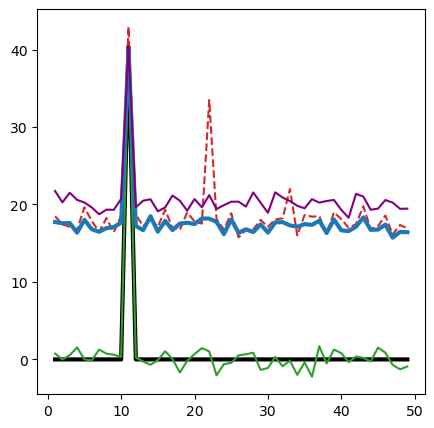

In [95]:
l = 1
c = 2
m = 1
k = 0
power1_true = power1s[k,l,c,m,0,:] 
power1_zs = power1s[k,l,c,m,1,:] 
power1_model = power1s[k,l,c,m,2,:] 
power1_naive = power1s[k,l,c,m,3,:] 

fig, ax = plt.subplots(figsize=(5,5), sharex=True, sharey=True)
ax.plot(freqs_mod, power1_true, color='k', label='true', linewidth=3)
ax.plot(freqs_mod, power1_naive, linestyle='--', color='tab:red', label='naive')
ax.plot(freqs_mod, power1_zs, color='tab:green', label='direct')
ax.plot(freqs_mod, power1_model, color='tab:blue', linewidth=3, label='model')
# plt.plot(10*np.log10(refit_true_Gamma[:,0,0].real))
plt.plot(freqs_mod, 10*np.log10(refitted_load['Gamma'][:,0,0].real), color='purple')

if l == 0:
    ax.set_title(f'# neurons = {Cs[c]}', fontweight='bold')
if c == 0:
    ax.set_ylabel(f'# trials = {Ls[l]}', fontweight='bold')
if l == len(Ls)-1:
    ax.set_xlabel('Freq (Hz)', fontweight='bold')

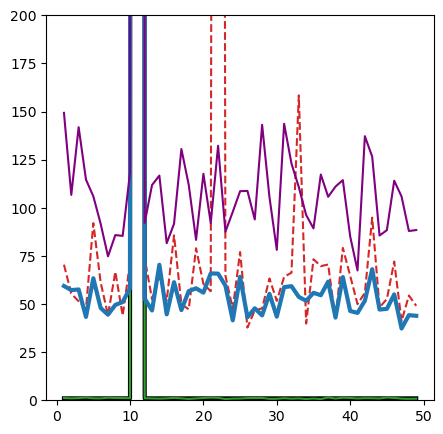

In [99]:
l = 1
c = 2
m = 1
k = 0
power1_true = power1s_nodb[k,l,c,m,0,:] 
power1_zs = power1s_nodb[k,l,c,m,1,:] 
power1_model = power1s_nodb[k,l,c,m,2,:] 
power1_naive = power1s_nodb[k,l,c,m,3,:] 

fig, ax = plt.subplots(figsize=(5,5), sharex=True, sharey=True)
ax.plot(freqs_mod, power1_true, color='k', label='true', linewidth=3)
ax.plot(freqs_mod, power1_naive, linestyle='--', color='tab:red', label='naive')
ax.plot(freqs_mod, power1_zs, color='tab:green', label='direct')
ax.plot(freqs_mod, power1_model, color='tab:blue', linewidth=3, label='model')
# plt.plot(10*np.log10(refit_true_Gamma[:,0,0].real))
ax.plot(freqs_mod, (refitted_load['Gamma'][:,0,0].real), color='purple')

ax.set_ylim([0,200])

if l == 0:
    ax.set_title(f'# neurons = {Cs[c]}', fontweight='bold')
if c == 0:
    ax.set_ylabel(f'# trials = {Ls[l]}', fontweight='bold')
if l == len(Ls)-1:
    ax.set_xlabel('Freq (Hz)', fontweight='bold')

In [90]:
refitted_data_path = f'saved/synthetic_data/model_sampled_{K}_{L}_{sample_length}_{C}_{mu}_{seed}'
refitted_path = f'saved/fitted_models/model_sampled_{K}_{L}_{sample_length}_{C}_{mu}_{seed}_fitted'
refitted_data_load = pickle_open(refitted_data_path)
refitted_load = pickle_open(refitted_path)


In [91]:
refit_true_Gamma = refitted_data_load['latent']['Gamma']

/scratch/247090.1.ood/ipykernel_429751/829909389.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(refit_true_Gamma[:,0,0].real))


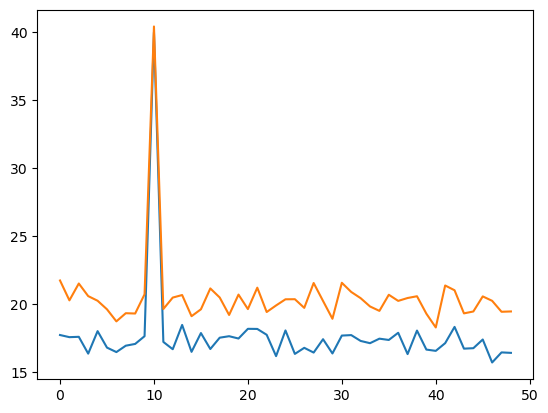

In [92]:
plt.plot(10*np.log10(refit_true_Gamma[:,0,0].real))
plt.plot(10*np.log10(refitted_load['Gamma'][:,0,0].real))